<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
from apps.lib import Sensor, Performance, Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

WHO = 7
SONG = 1
TRAIN_ORDER = 3

In [2]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
sensor_data = Sensor(verbose=1)

13:36:12 INFO << load arm CSV.
13:36:12 INFO << load drummer CSV.


In [4]:
def gogo(who_id, song_id, train_pf_order):
    train_pf = Performance(sensor_data, who_id, song_id, train_pf_order)
    
    pfs = []
    for pf_order in tqdm(range(1, 3 + 1)):
        if pf_order == train_pf_order:
            pfs.append(train_pf)
        else:
            pfs.append(Performance(sensor_data, 7, 1, pf_order)) 
            
    return pfs

In [5]:
pfs = gogo(WHO, SONG, TRAIN_ORDER)

100%|██████████| 3/3 [00:23<00:00,  7.96s/it]


13:36:48 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
13:36:48 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


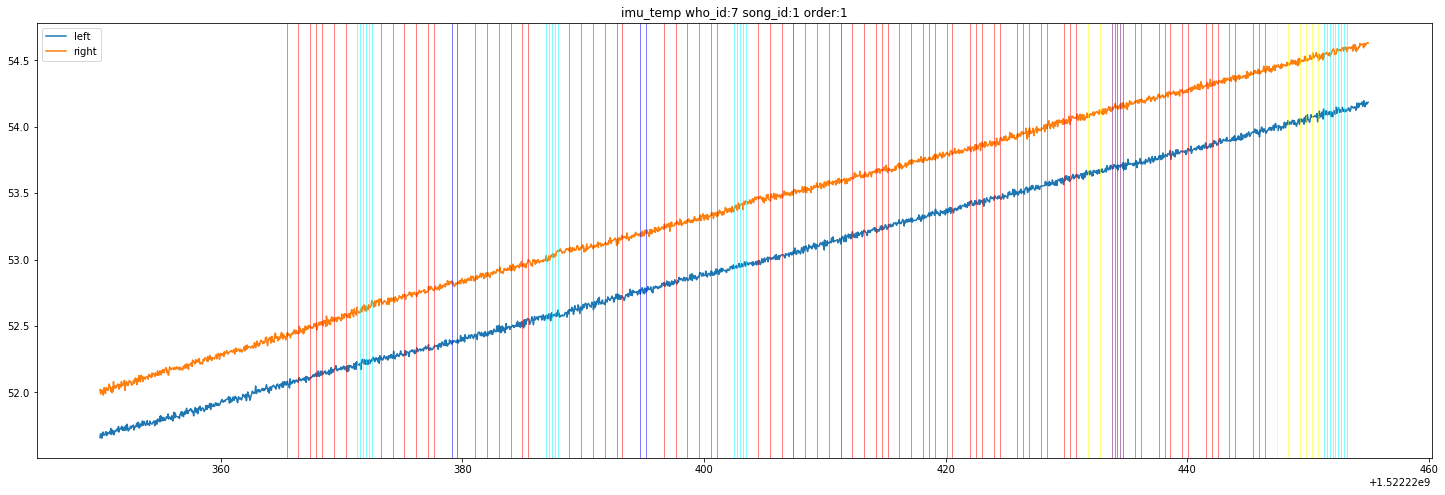

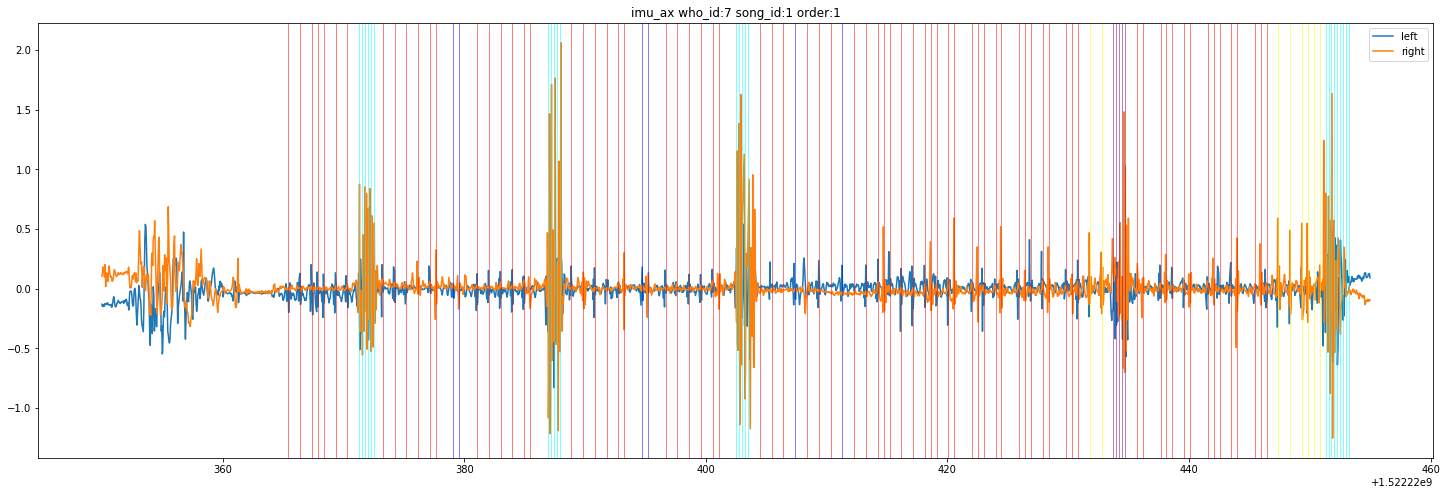

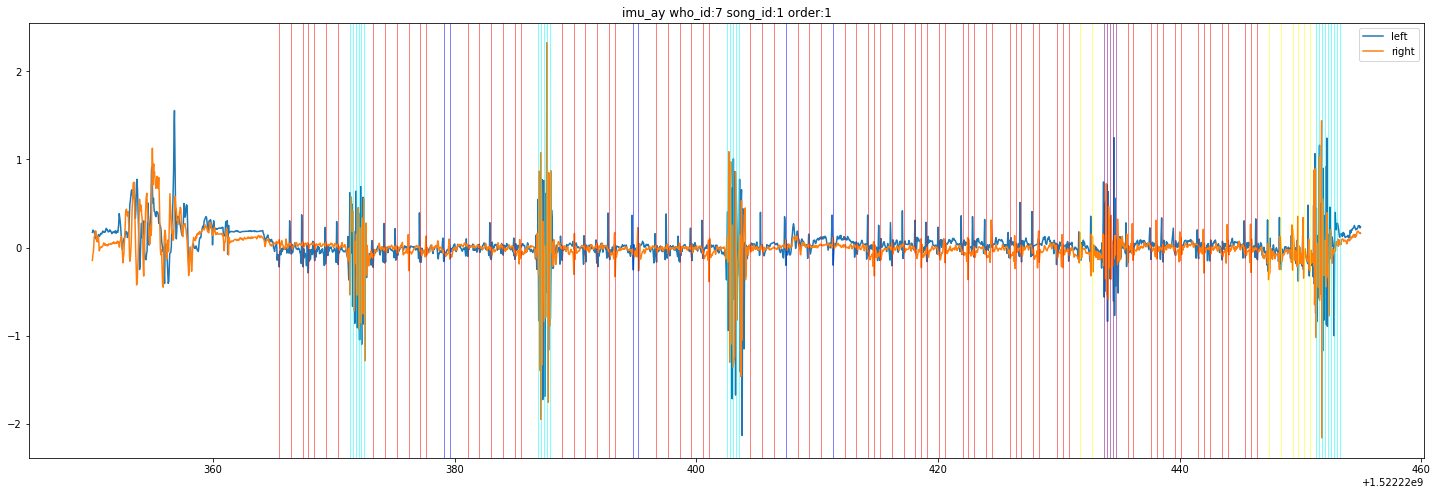

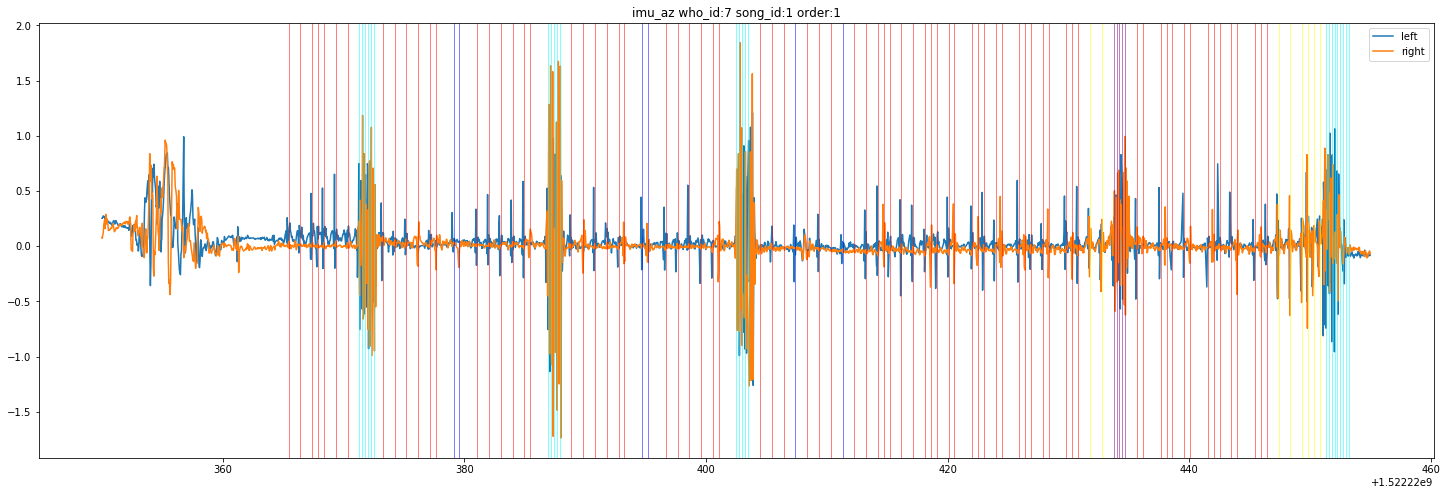

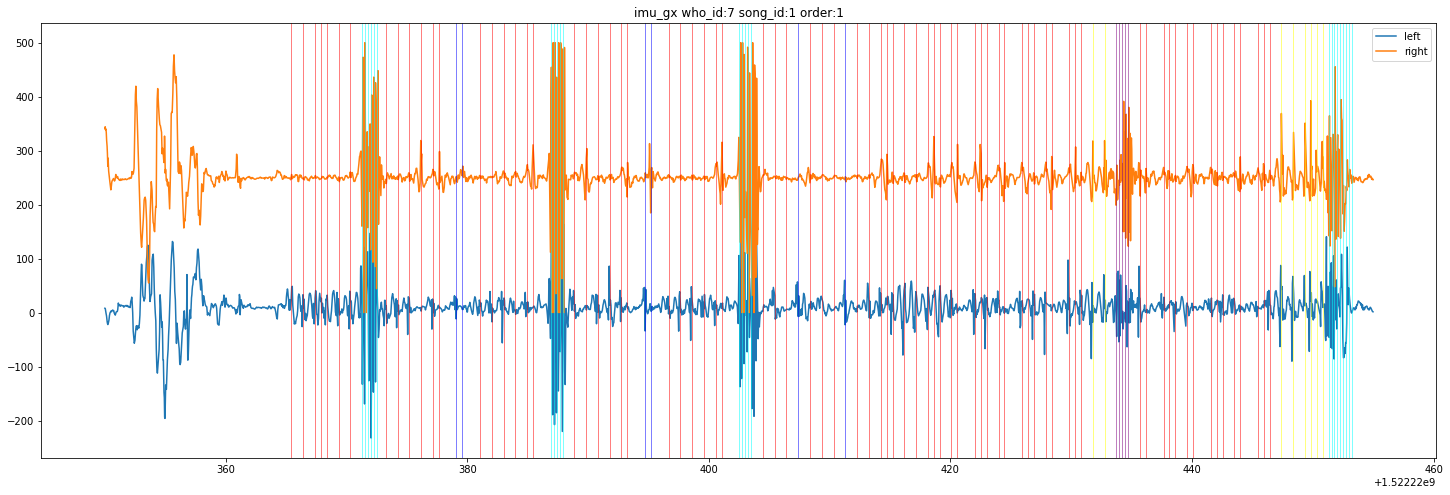

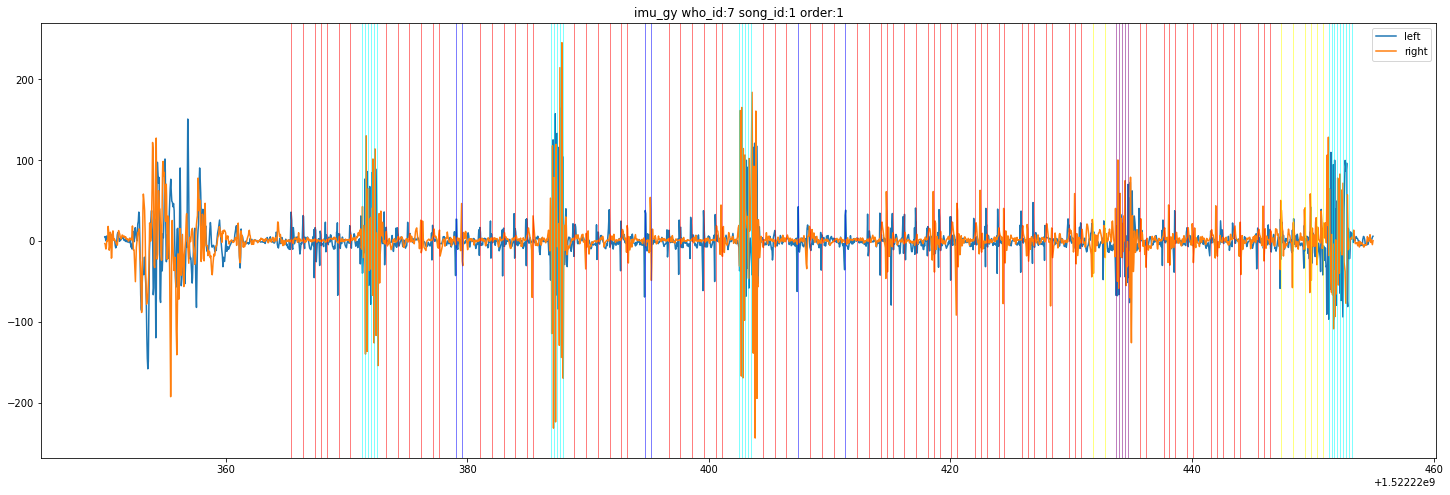

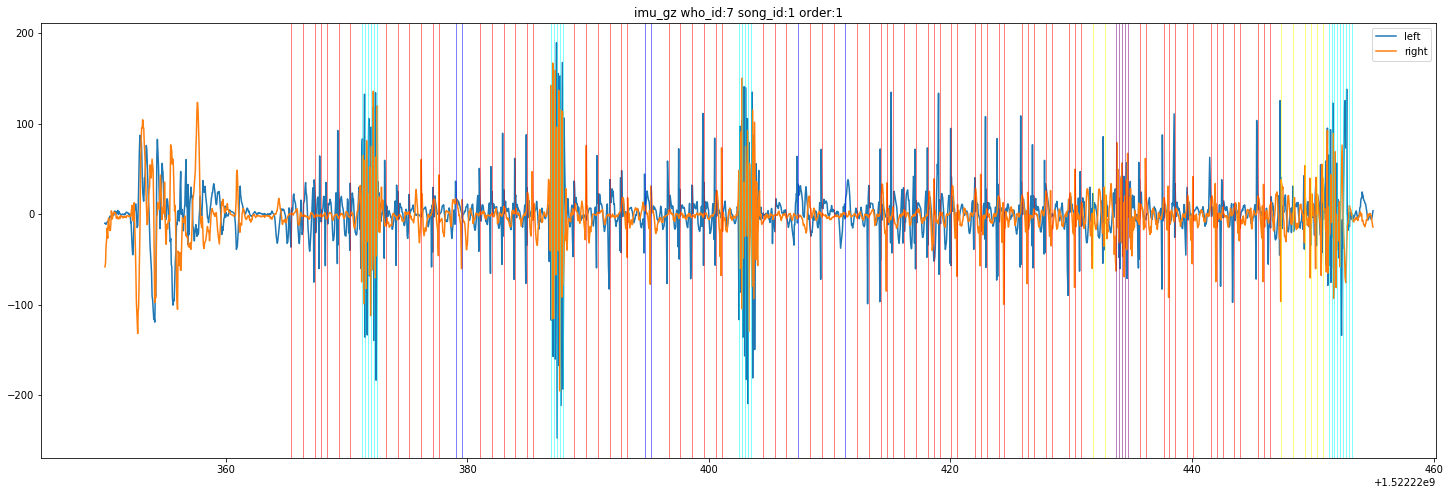

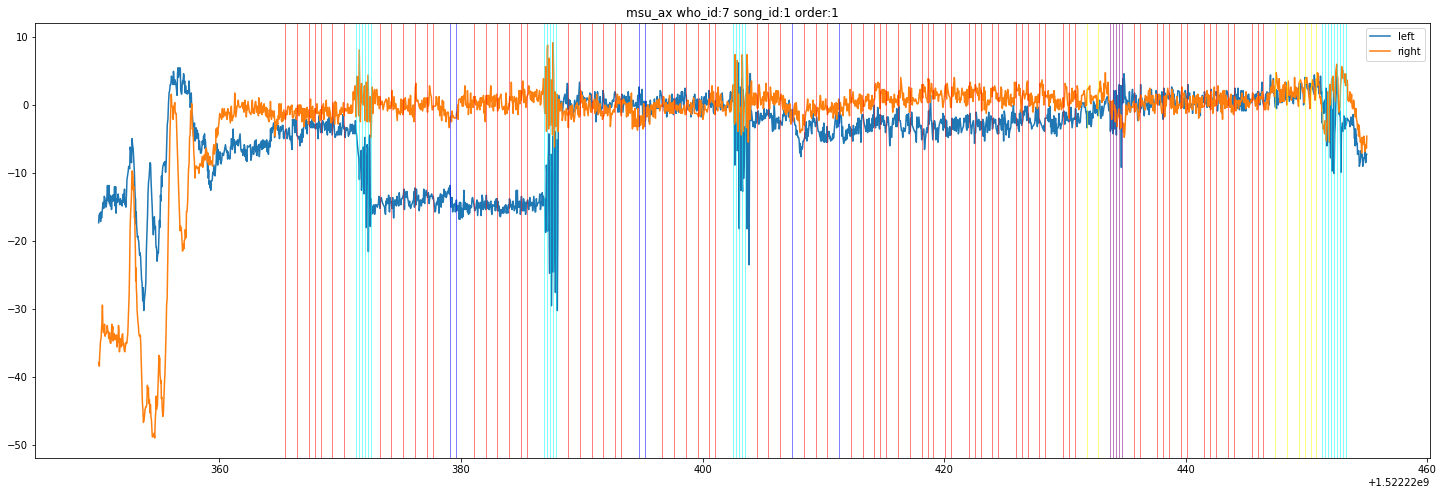

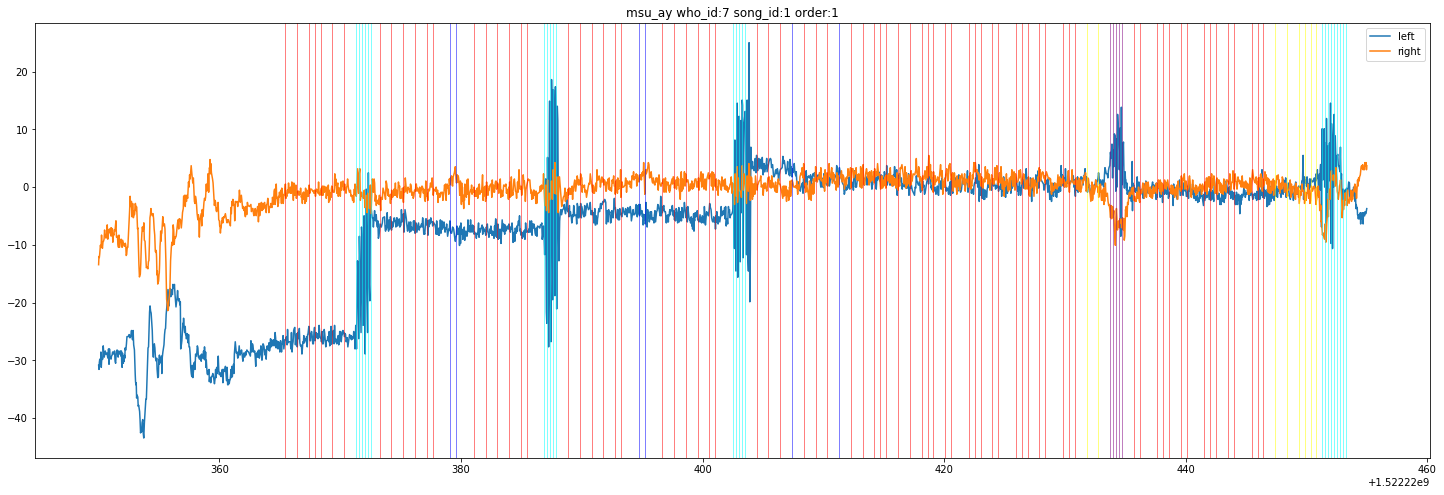

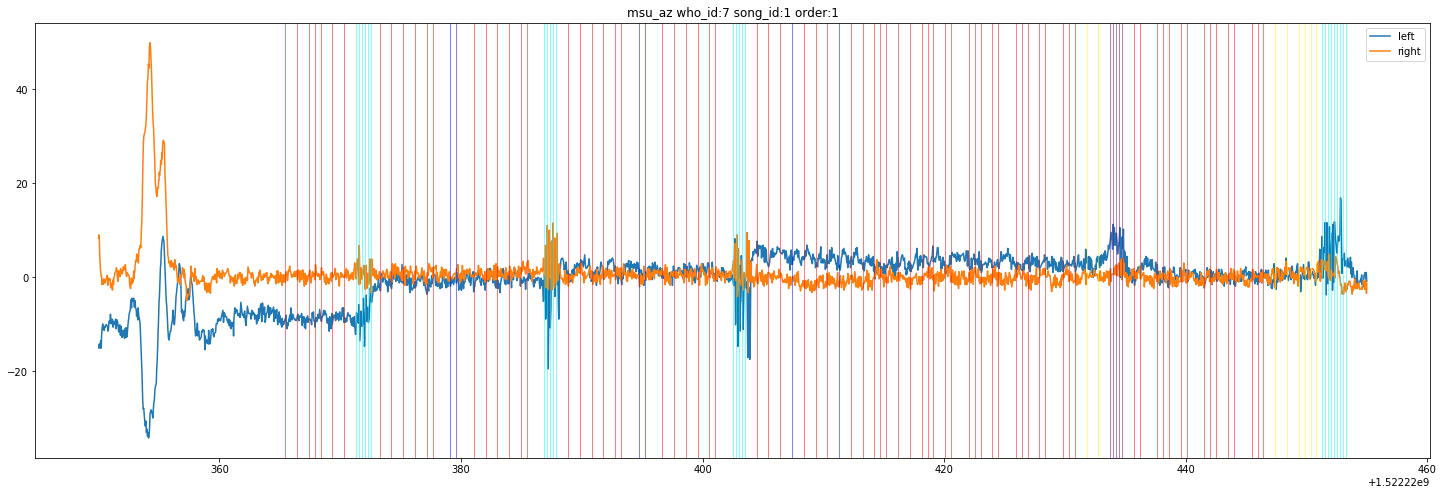

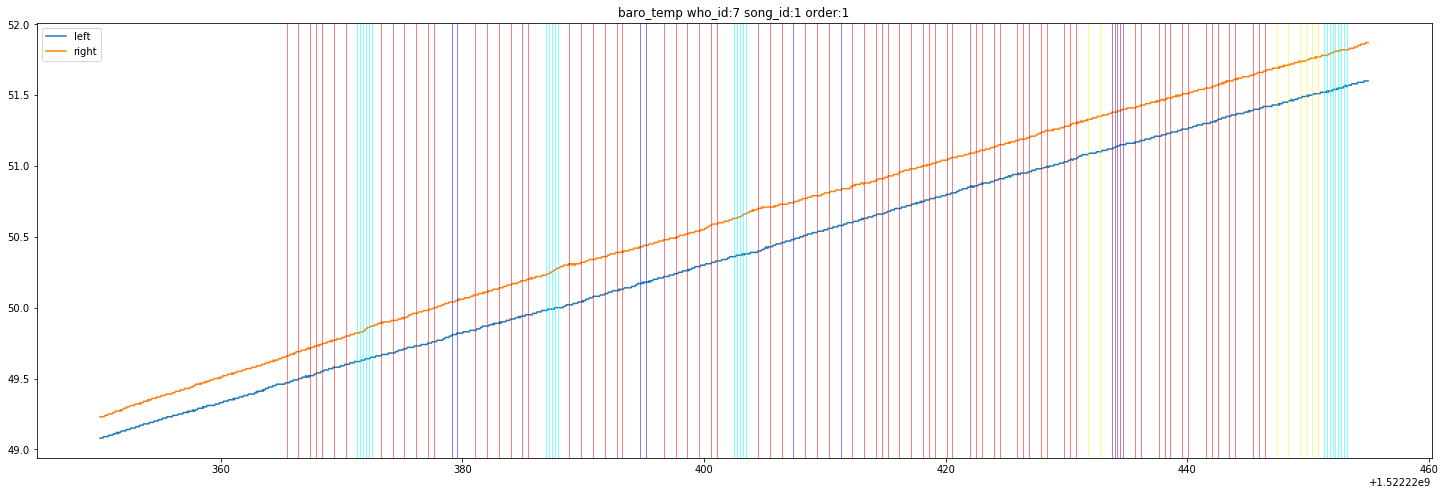

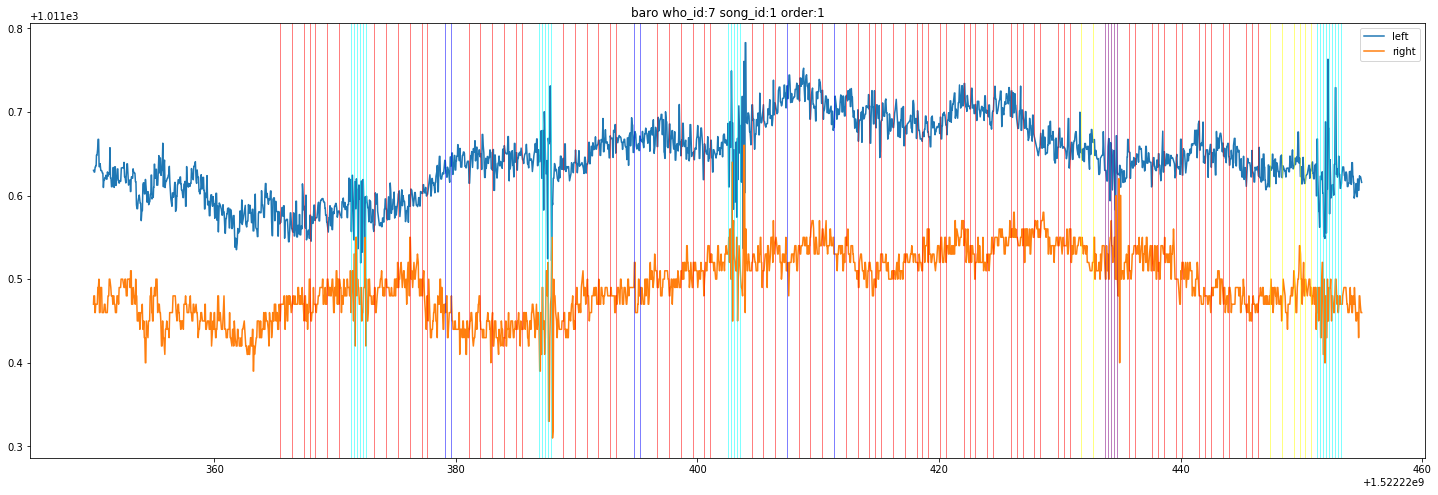

In [6]:
pfs[0].plot_global_event()

In [7]:
# for i in range(len(pfs)):
#     print(pfs[i].primitive_df)
pfs[2].primitive_df

,L_AAI,L_AVI,L_ASMA,L_GAI,L_GVI,L_GSMA,L_AAE,L_ARE,L_MAMI,L_MGMI,...,R_AMCR,R_GMCR,R_AXYCORR,R_AYZCORR,R_AZXCORR,R_GXYCORR,R_GYZCORR,R_GZXCORR,R_EVA1,R_EVA2
0,0.309347,0.000081,0.517000,36.565754,3.175080,47.920000,0.095777,1340.229455,0.306826,37.237233,...,0.125000,0.125000,-0.858755,-0.919587,0.978857,-0.440483,0.225211,-0.891340,0.149841,2.839004
1,0.322940,0.000064,0.539000,30.909937,6.215965,42.304833,0.104354,961.640185,0.322768,30.745422,...,0.125000,0.125000,-0.941259,0.797508,-0.725630,-0.023913,-0.061713,-0.970444,0.302676,2.646287
2,0.316083,0.000040,0.527750,26.085505,27.127838,38.514500,0.099949,707.581404,0.316215,27.303804,...,0.285714,0.142857,-0.776342,0.920873,-0.872811,-0.632627,0.694850,-0.872966,0.227984,2.714732
3,0.289014,0.000561,0.469833,8.983129,5.038434,13.857833,0.084090,85.735043,0.287197,9.438831,...,0.400000,0.200000,-0.786873,-0.305111,-0.236955,0.963993,-0.754567,-0.704270,1.152703,1.790206
4,0.192897,0.000602,0.298333,20.229647,28.691341,27.315833,0.037811,437.929953,0.192514,19.727359,...,0.500000,0.333333,-0.686113,-0.335733,0.132368,-0.739886,-0.769274,0.879243,0.896696,1.821708
5,0.109169,0.000280,0.170200,25.110312,2.441044,37.488800,0.012198,632.968817,0.111651,24.497490,...,0.500000,0.166667,0.762187,0.046605,0.371284,-0.115852,-0.877924,0.119035,0.963345,1.866823
6,0.224880,0.002897,0.340000,37.610056,208.182420,56.940800,0.053468,1622.698743,0.259482,40.779251,...,0.200000,0.200000,0.331828,-0.775204,0.112832,0.794206,-0.648415,-0.947762,1.080934,1.807395
7,0.247019,0.006065,0.372000,43.232263,176.233319,61.431625,0.067084,2045.261911,0.251606,42.466397,...,0.200000,0.200000,0.489913,0.680661,-0.262029,-0.730755,0.931306,-0.842174,1.245553,1.729720
8,0.086769,0.001955,0.139875,14.580137,132.447831,20.779875,0.009484,345.028238,0.071256,8.477828,...,0.166667,0.166667,-0.806995,-0.483756,0.605177,-0.979480,0.337953,-0.441747,0.549287,2.273757
9,0.097352,0.000256,0.154000,9.447383,6.445182,13.862000,0.009734,95.698234,0.092363,9.190496,...,0.200000,0.200000,-0.225660,0.003620,0.440047,0.558452,0.042154,0.733924,1.002939,1.493071


In [8]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3, 5, 6], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

[[1.70117762e-01 2.18990638e-04 1.96750229e-01 ... 4.83659216e-02
  1.03712382e-01 9.18189090e-01]
 [1.78189474e-01 1.65194587e-04 2.05705757e-01 ... 8.56452231e-03
  2.09497928e-01 8.20258774e-01]
 [1.74117907e-01 9.24659447e-05 2.01126225e-01 ... 5.76108269e-02
  1.57799743e-01 8.55039274e-01]
 ...
 [6.91614119e-02 3.99398797e-04 5.79395502e-02 ... 7.40912077e-02
  7.42334795e-01 2.93977221e-01]
 [1.04152126e-01 3.48048154e-03 8.92838970e-02 ... 1.77719990e-01
  2.71263027e-01 7.86367369e-01]
 [1.41869734e-01 1.59589434e-03 1.34016305e-01 ... 8.22592660e-01
  2.75036470e-01 6.74561167e-01]]


100%|██████████| 361/361 [01:41<00:00,  3.56it/s]

let's go centroid=50, C=50.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [01:41<00:00,  3.57it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98333333 0.         0.         0.         0.01666667 0.        ]
 [1.         0.         0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.        ]
 [0.875      0.         0.         0.         0.125      0.        ]
 [0.68       0.         0.         0.         0.32       0.        ]
 [0.2        0.         0.         0.         0.8        0.        ]]


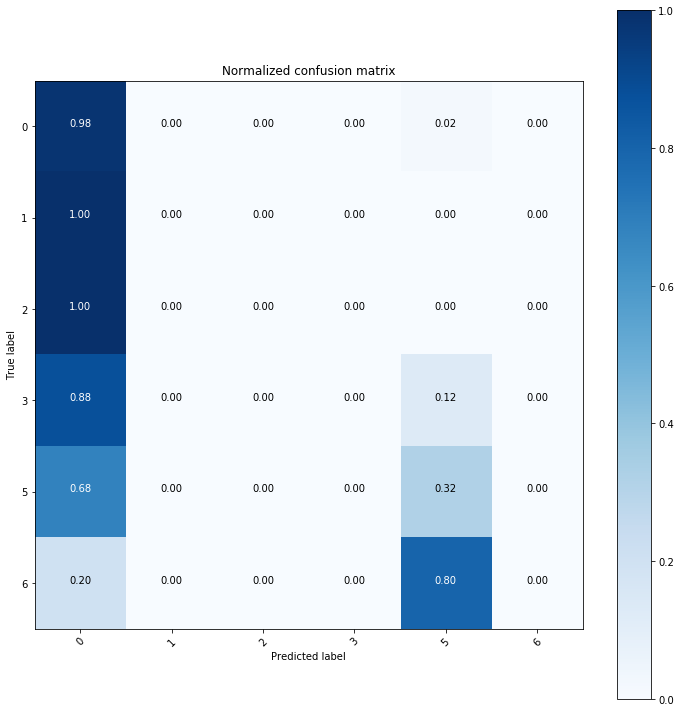

predicting 2 performance


100%|██████████| 361/361 [01:41<00:00,  3.57it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.96666667 0.01666667 0.         0.         0.01666667 0.        ]
 [0.96103896 0.02597403 0.         0.         0.01298701 0.        ]
 [1.         0.         0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.        ]
 [0.92       0.         0.         0.         0.08       0.        ]
 [0.         0.         0.         0.         1.         0.        ]]


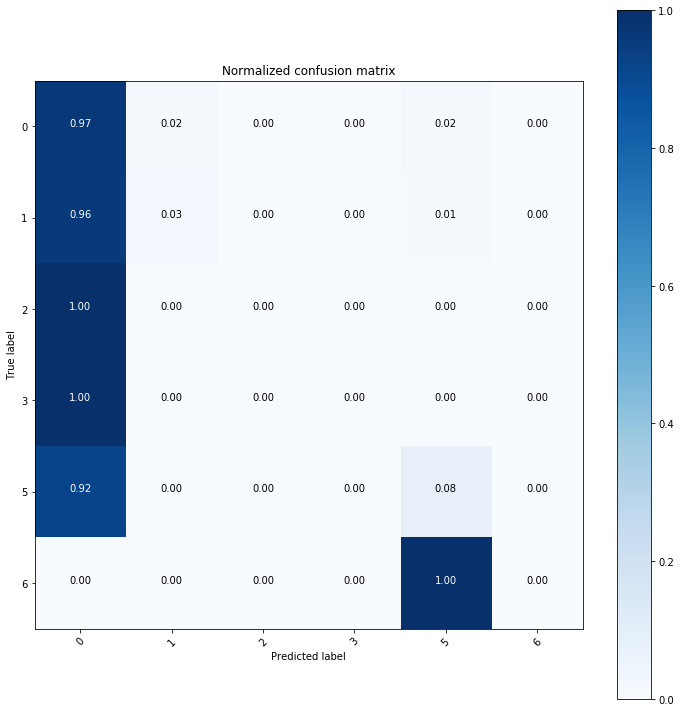

predicting 3 performance


100%|██████████| 361/361 [01:41<00:00,  3.56it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99583333 0.00416667 0.         0.         0.         0.        ]
 [0.85714286 0.14285714 0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


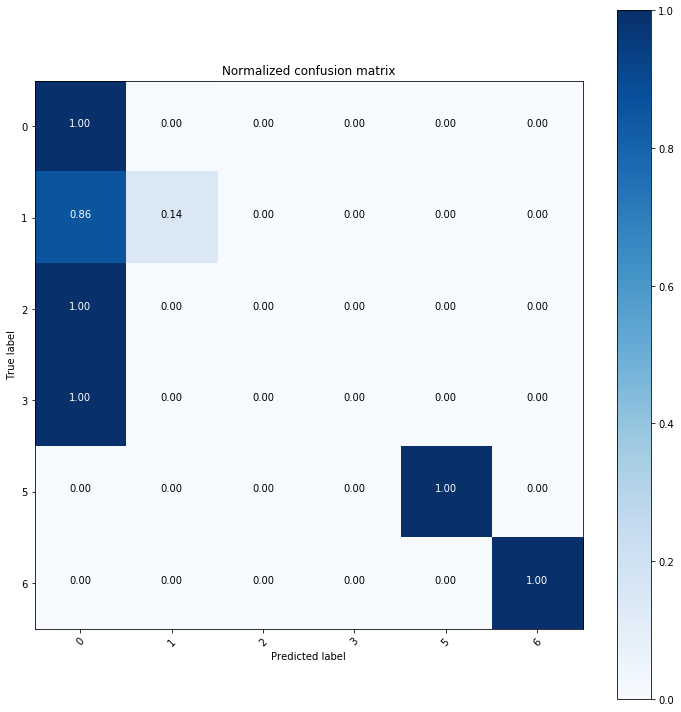

[[1.70117762e-01 2.18990638e-04 1.96750229e-01 ... 4.83659216e-02
  1.03712382e-01 9.18189090e-01]
 [1.78189474e-01 1.65194587e-04 2.05705757e-01 ... 8.56452231e-03
  2.09497928e-01 8.20258774e-01]
 [1.74117907e-01 9.24659447e-05 2.01126225e-01 ... 5.76108269e-02
  1.57799743e-01 8.55039274e-01]
 ...
 [6.91614119e-02 3.99398797e-04 5.79395502e-02 ... 7.40912077e-02
  7.42334795e-01 2.93977221e-01]
 [1.04152126e-01 3.48048154e-03 8.92838970e-02 ... 1.77719990e-01
  2.71263027e-01 7.86367369e-01]
 [1.41869734e-01 1.59589434e-03 1.34016305e-01 ... 8.22592660e-01
  2.75036470e-01 6.74561167e-01]]


100%|██████████| 361/361 [01:41<00:00,  3.56it/s]

let's go centroid=50, C=200.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [01:41<00:00,  3.57it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.93333333 0.05       0.         0.         0.01666667 0.        ]
 [0.98701299 0.01298701 0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.        ]
 [0.76       0.         0.         0.         0.24       0.        ]
 [0.2        0.         0.         0.         0.8        0.        ]]


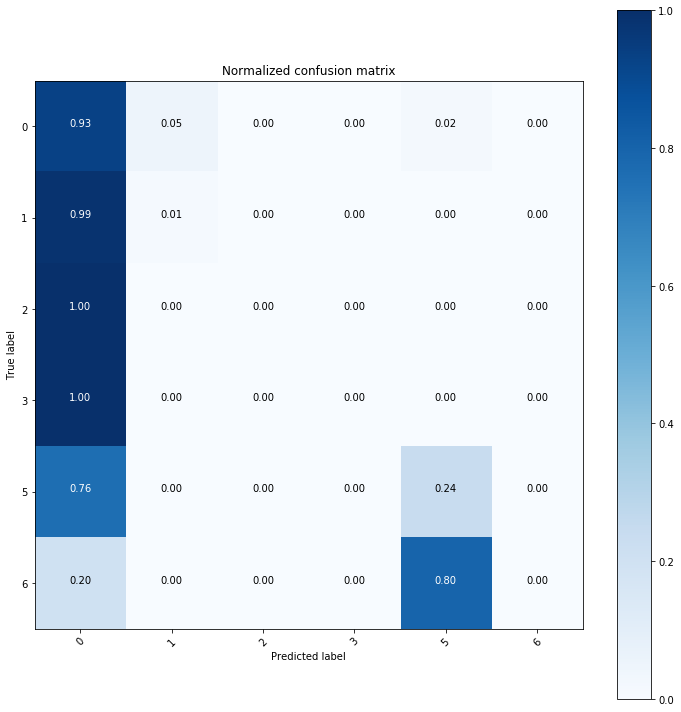

predicting 2 performance


100%|██████████| 361/361 [01:41<00:00,  3.57it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.89583333 0.0875     0.         0.         0.01666667 0.        ]
 [0.83116883 0.15584416 0.         0.         0.01298701 0.        ]
 [1.         0.         0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.        ]
 [0.92       0.         0.         0.         0.08       0.        ]
 [0.         0.         0.         0.         1.         0.        ]]


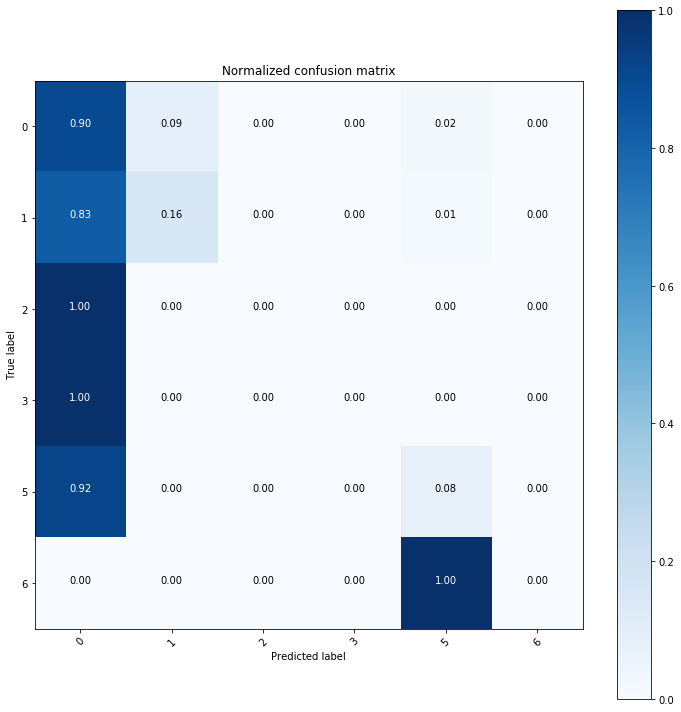

predicting 3 performance


100%|██████████| 361/361 [01:41<00:00,  3.56it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.96666667 0.02916667 0.00416667 0.         0.         0.        ]
 [0.37662338 0.62337662 0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


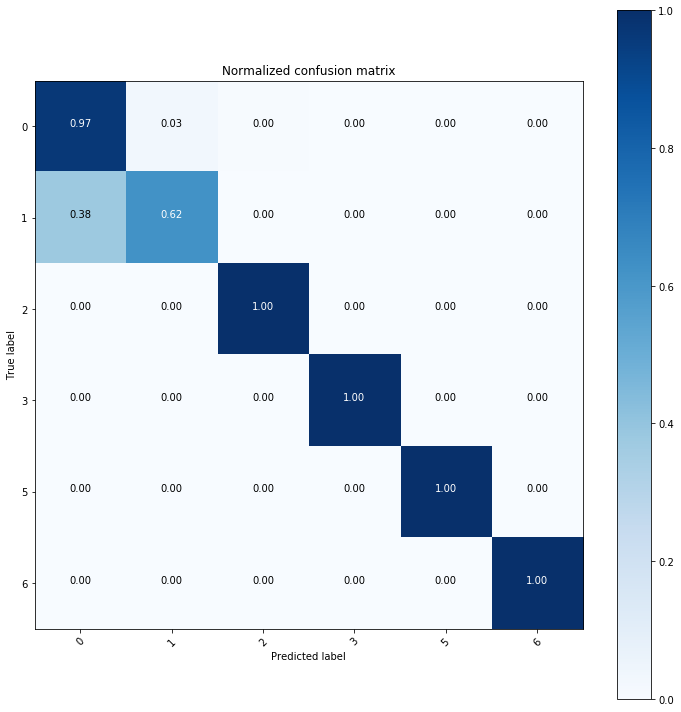

[[1.70117762e-01 2.18990638e-04 1.96750229e-01 ... 4.83659216e-02
  1.03712382e-01 9.18189090e-01]
 [1.78189474e-01 1.65194587e-04 2.05705757e-01 ... 8.56452231e-03
  2.09497928e-01 8.20258774e-01]
 [1.74117907e-01 9.24659447e-05 2.01126225e-01 ... 5.76108269e-02
  1.57799743e-01 8.55039274e-01]
 ...
 [6.91614119e-02 3.99398797e-04 5.79395502e-02 ... 7.40912077e-02
  7.42334795e-01 2.93977221e-01]
 [1.04152126e-01 3.48048154e-03 8.92838970e-02 ... 1.77719990e-01
  2.71263027e-01 7.86367369e-01]
 [1.41869734e-01 1.59589434e-03 1.34016305e-01 ... 8.22592660e-01
  2.75036470e-01 6.74561167e-01]]


100%|██████████| 361/361 [01:41<00:00,  3.56it/s]

let's go centroid=50, C=500.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [01:41<00:00,  3.57it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.94583333 0.0375     0.         0.         0.01666667 0.        ]
 [0.98701299 0.01298701 0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.        ]
 [0.76       0.         0.         0.         0.24       0.        ]
 [0.2        0.         0.         0.         0.8        0.        ]]


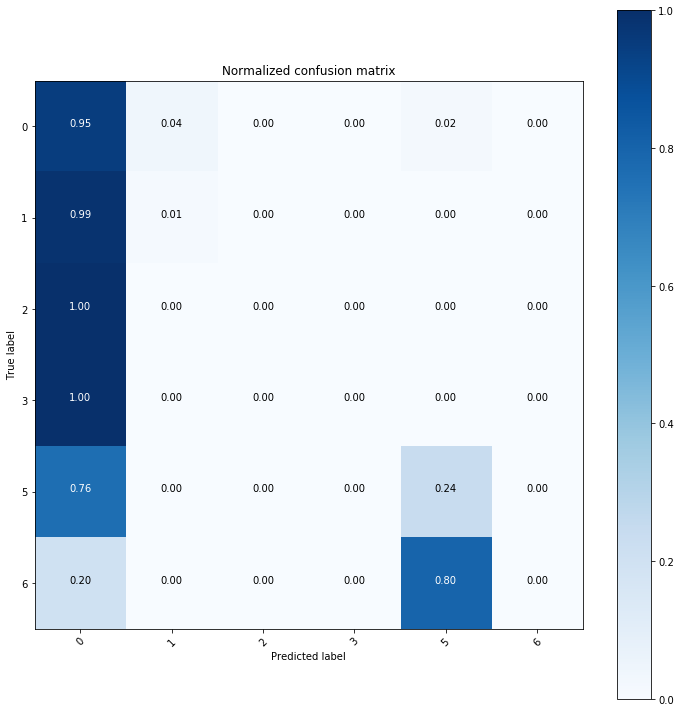

predicting 2 performance


100%|██████████| 361/361 [01:41<00:00,  3.57it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.91666667 0.06666667 0.         0.         0.01666667 0.        ]
 [0.8961039  0.09090909 0.         0.         0.01298701 0.        ]
 [1.         0.         0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.        ]
 [0.92       0.         0.         0.         0.08       0.        ]
 [0.         0.         0.         0.         1.         0.        ]]


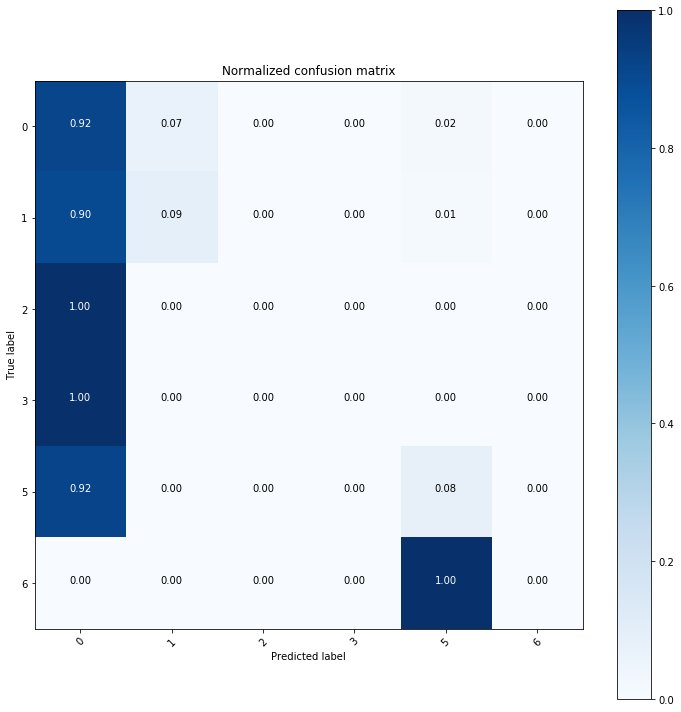

predicting 3 performance


100%|██████████| 361/361 [01:41<00:00,  3.56it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.97916667 0.01666667 0.00416667 0.         0.         0.        ]
 [0.23376623 0.76623377 0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


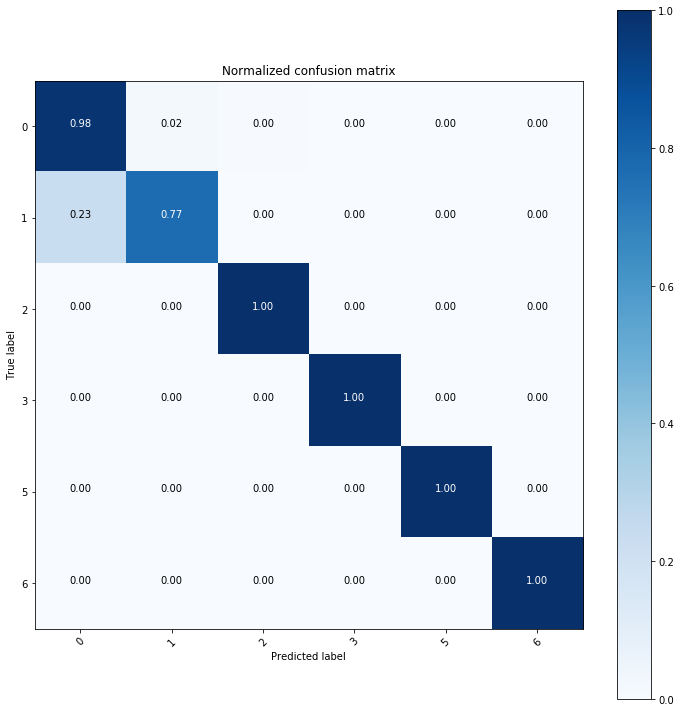

In [9]:
for k in [50]:
    for C in [50, 200, 500]: 
        model = Model(k_centroid=k, tolerance=C)
        model.fit(pfs[TRAIN_ORDER - 1])
        print('let\'s go centroid=%d, C=%.2f @@@@@@@@@@@@@@@' % (k, C))
        for od in range(len(pfs)):
            print('predicting %d performance' % (od + 1))
            pred_y, y = model.predict(pfs[od])
            
            print('============ prediction arm ============')
            cutstom_output_cnf_matrix(y, pred_y)